In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd

# Load datasets
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
sample_submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [3]:
# Shape of datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_submission.shape)

Train shape: (8693, 14)
Test shape: (4277, 13)
Sample submission shape: (4277, 2)


In [4]:
# Preview first rows
display(train.head())
display(test.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
# Info about data types and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Check missing values count
print("Missing values in train dataset:")
print(train.isnull().sum())

Missing values in train dataset:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [7]:
# Statistical summary of numeric columns
display(train.describe())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


- The training set contains 8,693 rows and 14 columns, while the test set has 4,277 rows and 13 columns, excluding the target Transported. There are six numerical features (mostly spending amounts and Age) and seven categorical/text features, with PassengerId being unique for each record. Missing values exist in most features (about 2–2.5%), but not in PassengerId or the target column. Spending features are highly skewed, with many zeros and a few extreme outliers, while Age ranges from 0 to 79 (mean ≈ 28.8). Several categorical features such as Cabin and PassengerId contain structured information that could be useful for feature engineering.

# EDA 

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# Display settings
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.rcParams['figure.dpi'] = 120

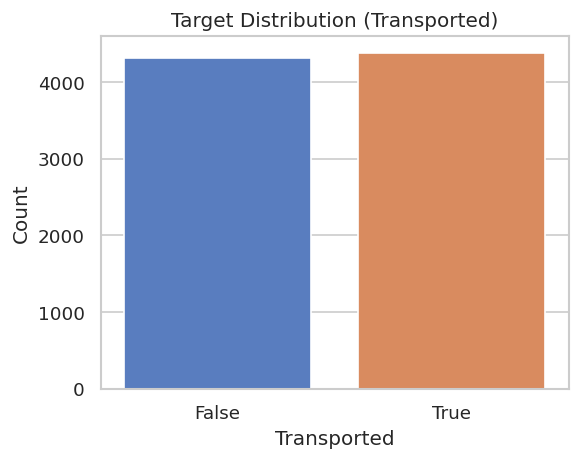

In [9]:
# ----- 1. Target distribution -----
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.countplot(data=train, x='Transported', ax=ax)
ax.set_title('Target Distribution (Transported)')
ax.set_xlabel('Transported')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

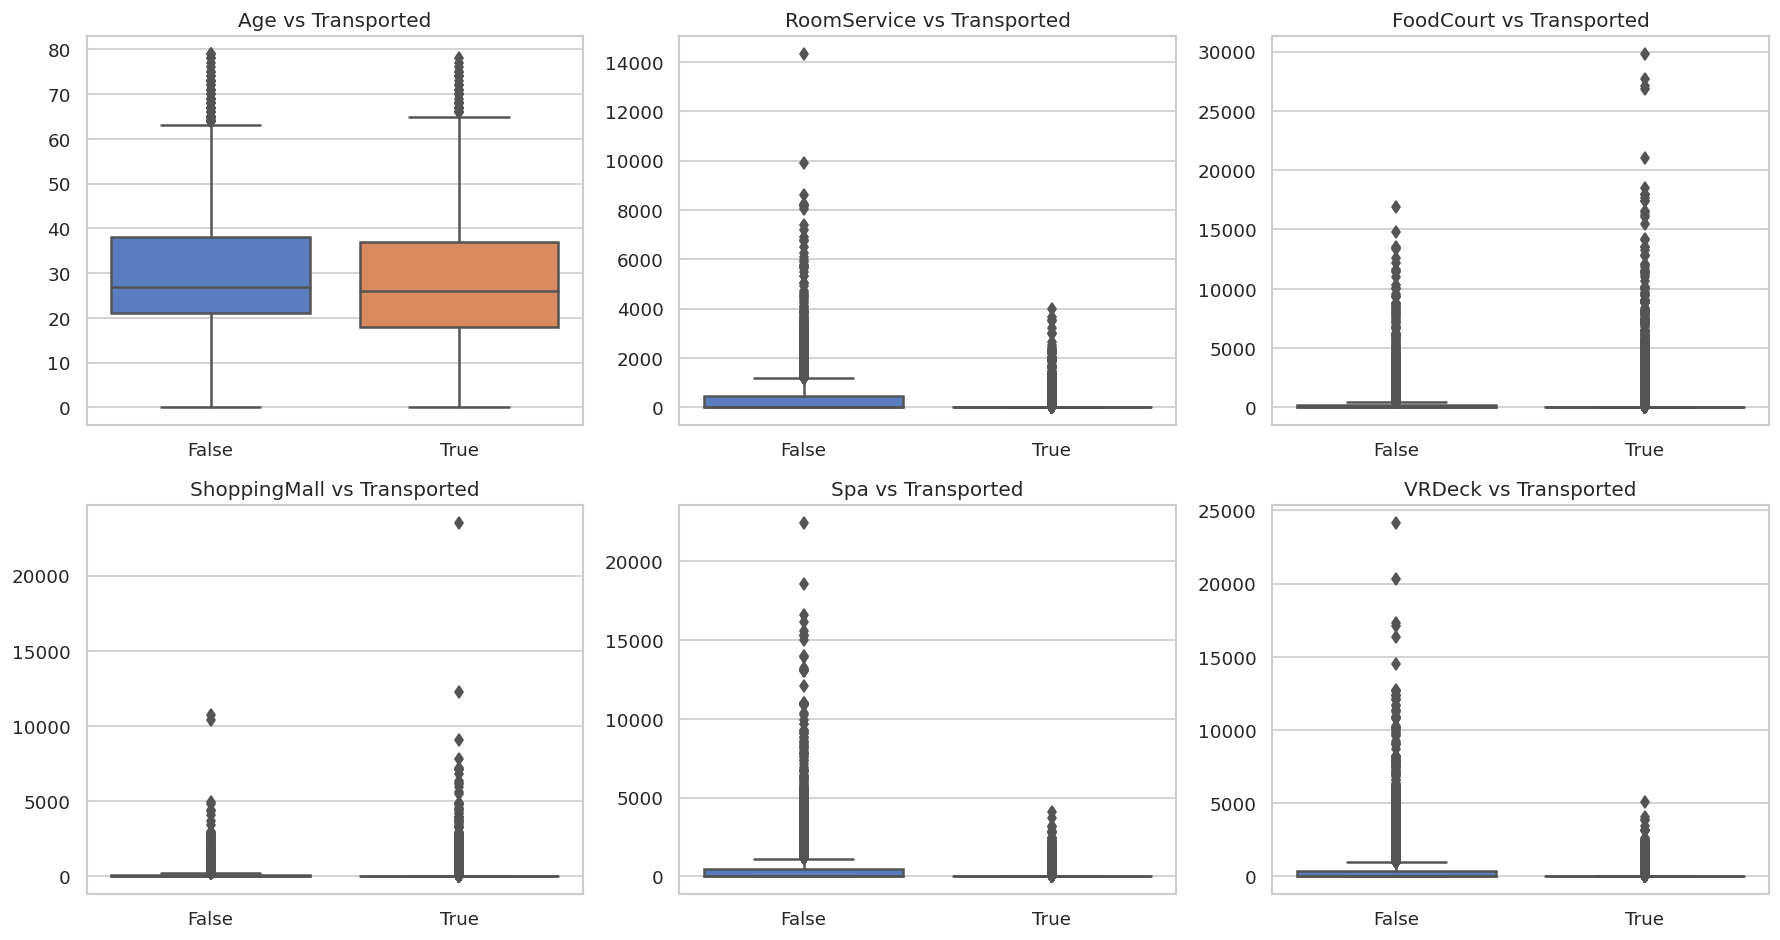

In [10]:
# ----- 2. Numerical features vs target -----
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for col, ax in zip(num_features, axes.flatten()):
    sns.boxplot(data=train, x='Transported', y=col, ax=ax)
    ax.set_title(f'{col} vs Transported')
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

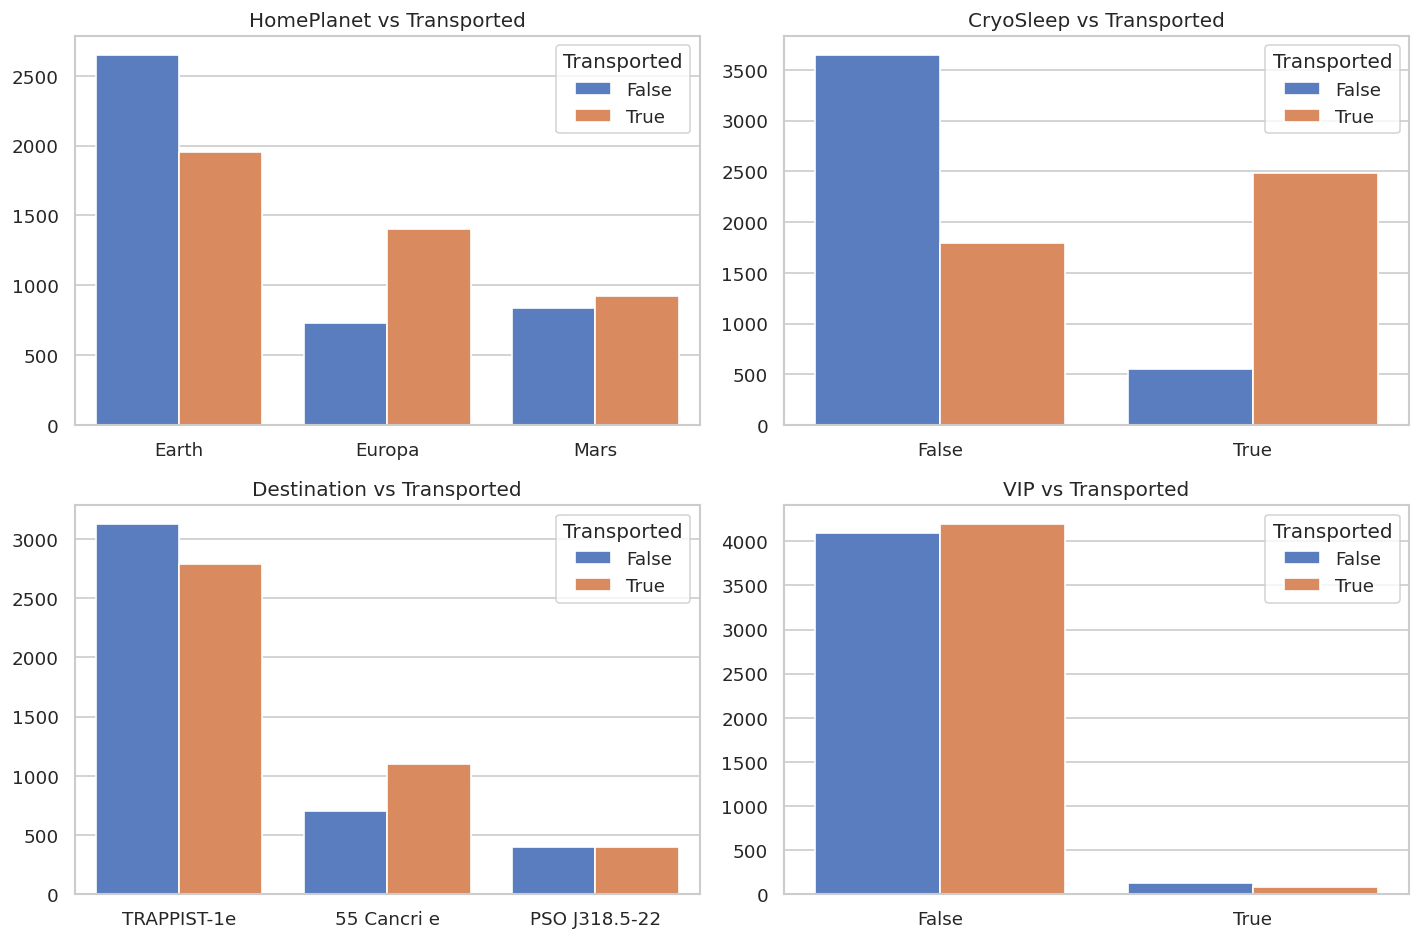

In [11]:
# ----- 3. Categorical features vs target -----
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for col, ax in zip(cat_features, axes.flatten()):
    sns.countplot(
        data=train, x=col, hue='Transported', 
        ax=ax, order=train[col].value_counts().index
    )
    ax.set_title(f'{col} vs Transported')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='Transported')
plt.tight_layout()
plt.show()

<Figure size 960x480 with 0 Axes>

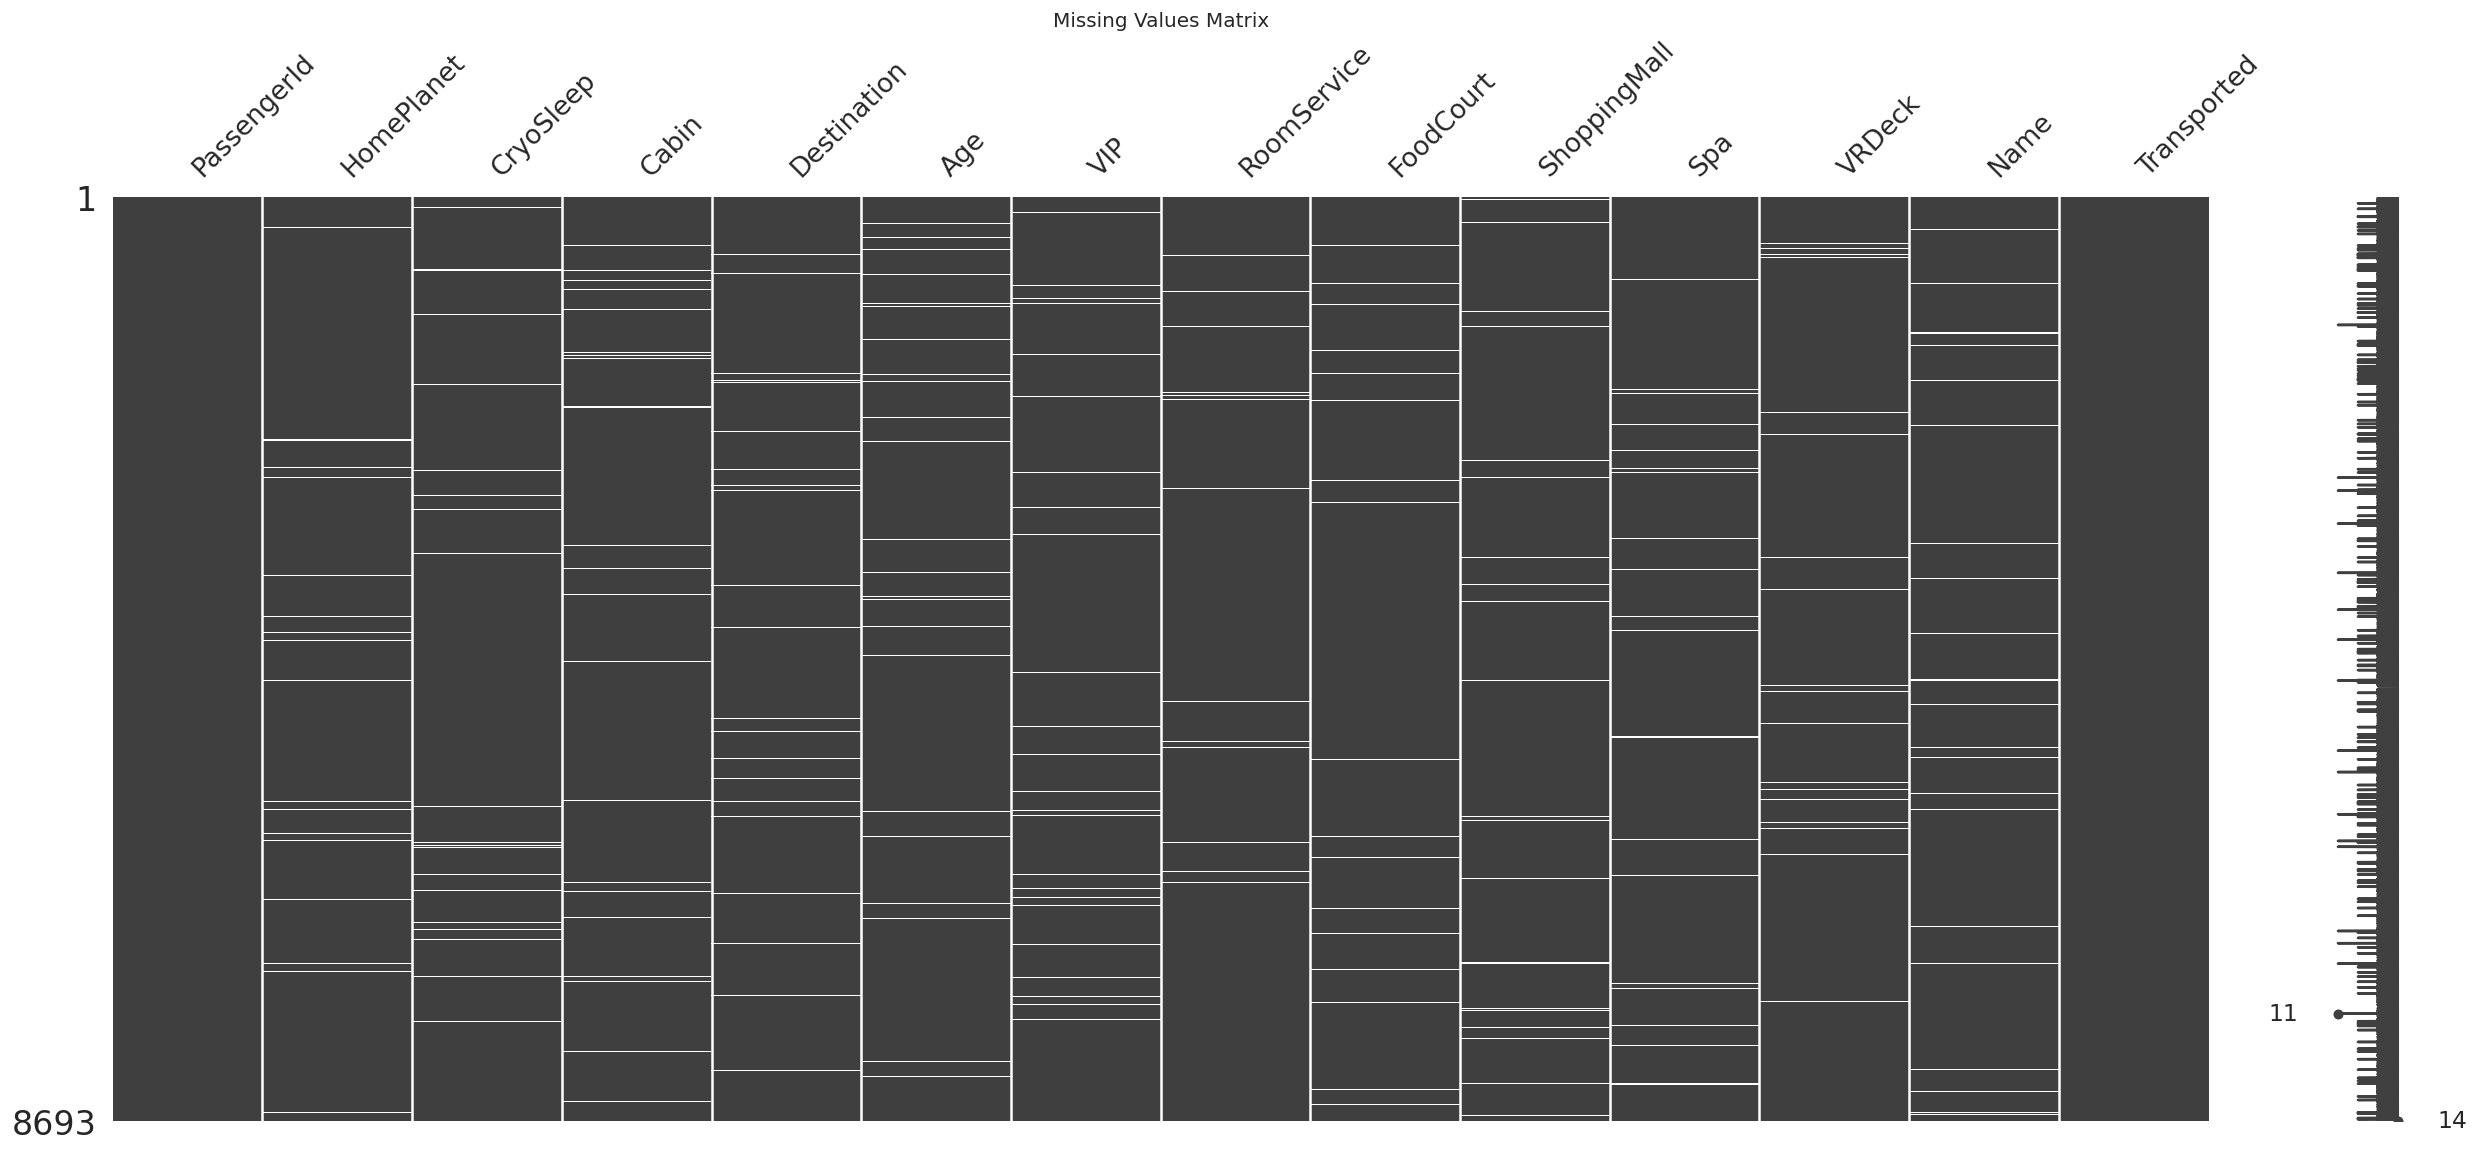

In [12]:
# ----- 4. Missing values visualisation -----
plt.figure(figsize=(8, 4))
msno.matrix(train)
plt.title('Missing Values Matrix')
plt.show()


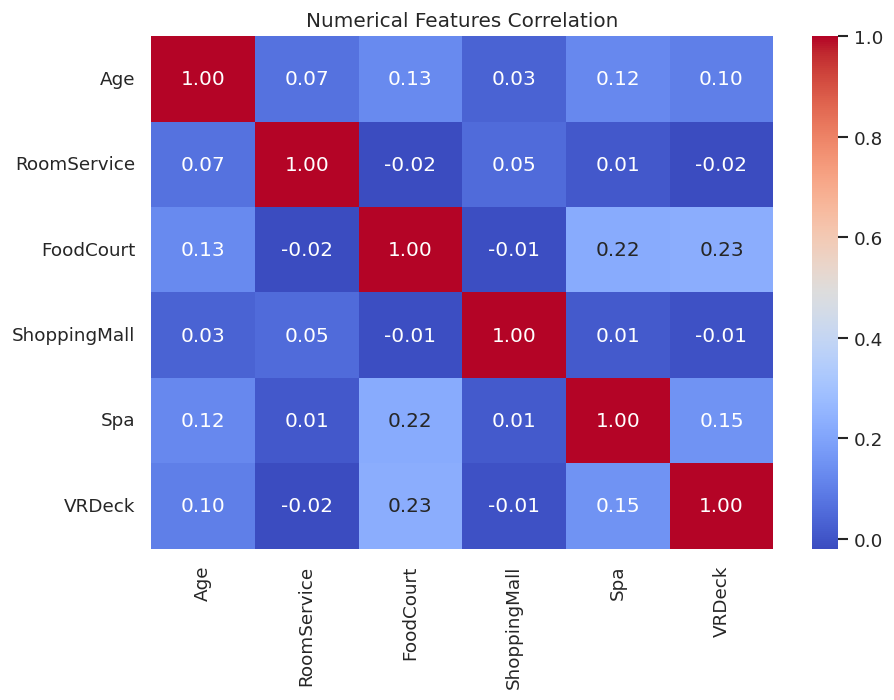

In [13]:
# ----- 5. Correlation heatmap -----
fig, ax = plt.subplots(figsize=(8, 6))
corr = train[num_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title('Numerical Features Correlation')
plt.tight_layout()
plt.show()

- The target Transported is nearly balanced, with roughly equal True and False cases. Spending features (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) are highly right‑skewed, dominated by zeros and a few extreme outliers. Median spending is low in both classes, while Age shows a wide range and only minor differences between groups. Passengers from Europa are more often transported, while those from Earth are less so. CryoSleep shows a strong positive association with transport likelihood, but VIP status has little effect. Destination also influences outcomes, with notable differences between destinations. Missing values (~2–2.5%) are scattered across most features. Correlations among numeric features are weak, suggesting they may contribute distinct signals.

# Cabin Split

In [14]:
# Cabin split into Deck / Number / Side
def split_cabin(df):
    # Split cabin into three parts
    cabin_split = df['Cabin'].str.split('/', expand=True)
    df['Deck'] = cabin_split[0]
    df['CabinNum'] = pd.to_numeric(cabin_split[1], errors='coerce')
    df['Side'] = cabin_split[2]
    return df

# Apply to train and test
train = split_cabin(train)
test = split_cabin(test)

# Quick check
print(train[['Cabin', 'Deck', 'CabinNum', 'Side']].head(10))
print(test[['Cabin', 'Deck', 'CabinNum', 'Side']].head(10))


   Cabin Deck  CabinNum Side
0  B/0/P    B       0.0    P
1  F/0/S    F       0.0    S
2  A/0/S    A       0.0    S
3  A/0/S    A       0.0    S
4  F/1/S    F       1.0    S
5  F/0/P    F       0.0    P
6  F/2/S    F       2.0    S
7  G/0/S    G       0.0    S
8  F/3/S    F       3.0    S
9  B/1/P    B       1.0    P
   Cabin Deck  CabinNum Side
0  G/3/S    G       3.0    S
1  F/4/S    F       4.0    S
2  C/0/S    C       0.0    S
3  C/1/S    C       1.0    S
4  F/5/S    F       5.0    S
5  F/7/P    F       7.0    P
6  B/2/P    B       2.0    P
7  D/0/S    D       0.0    S
8  D/0/S    D       0.0    S
9  F/7/S    F       7.0    S


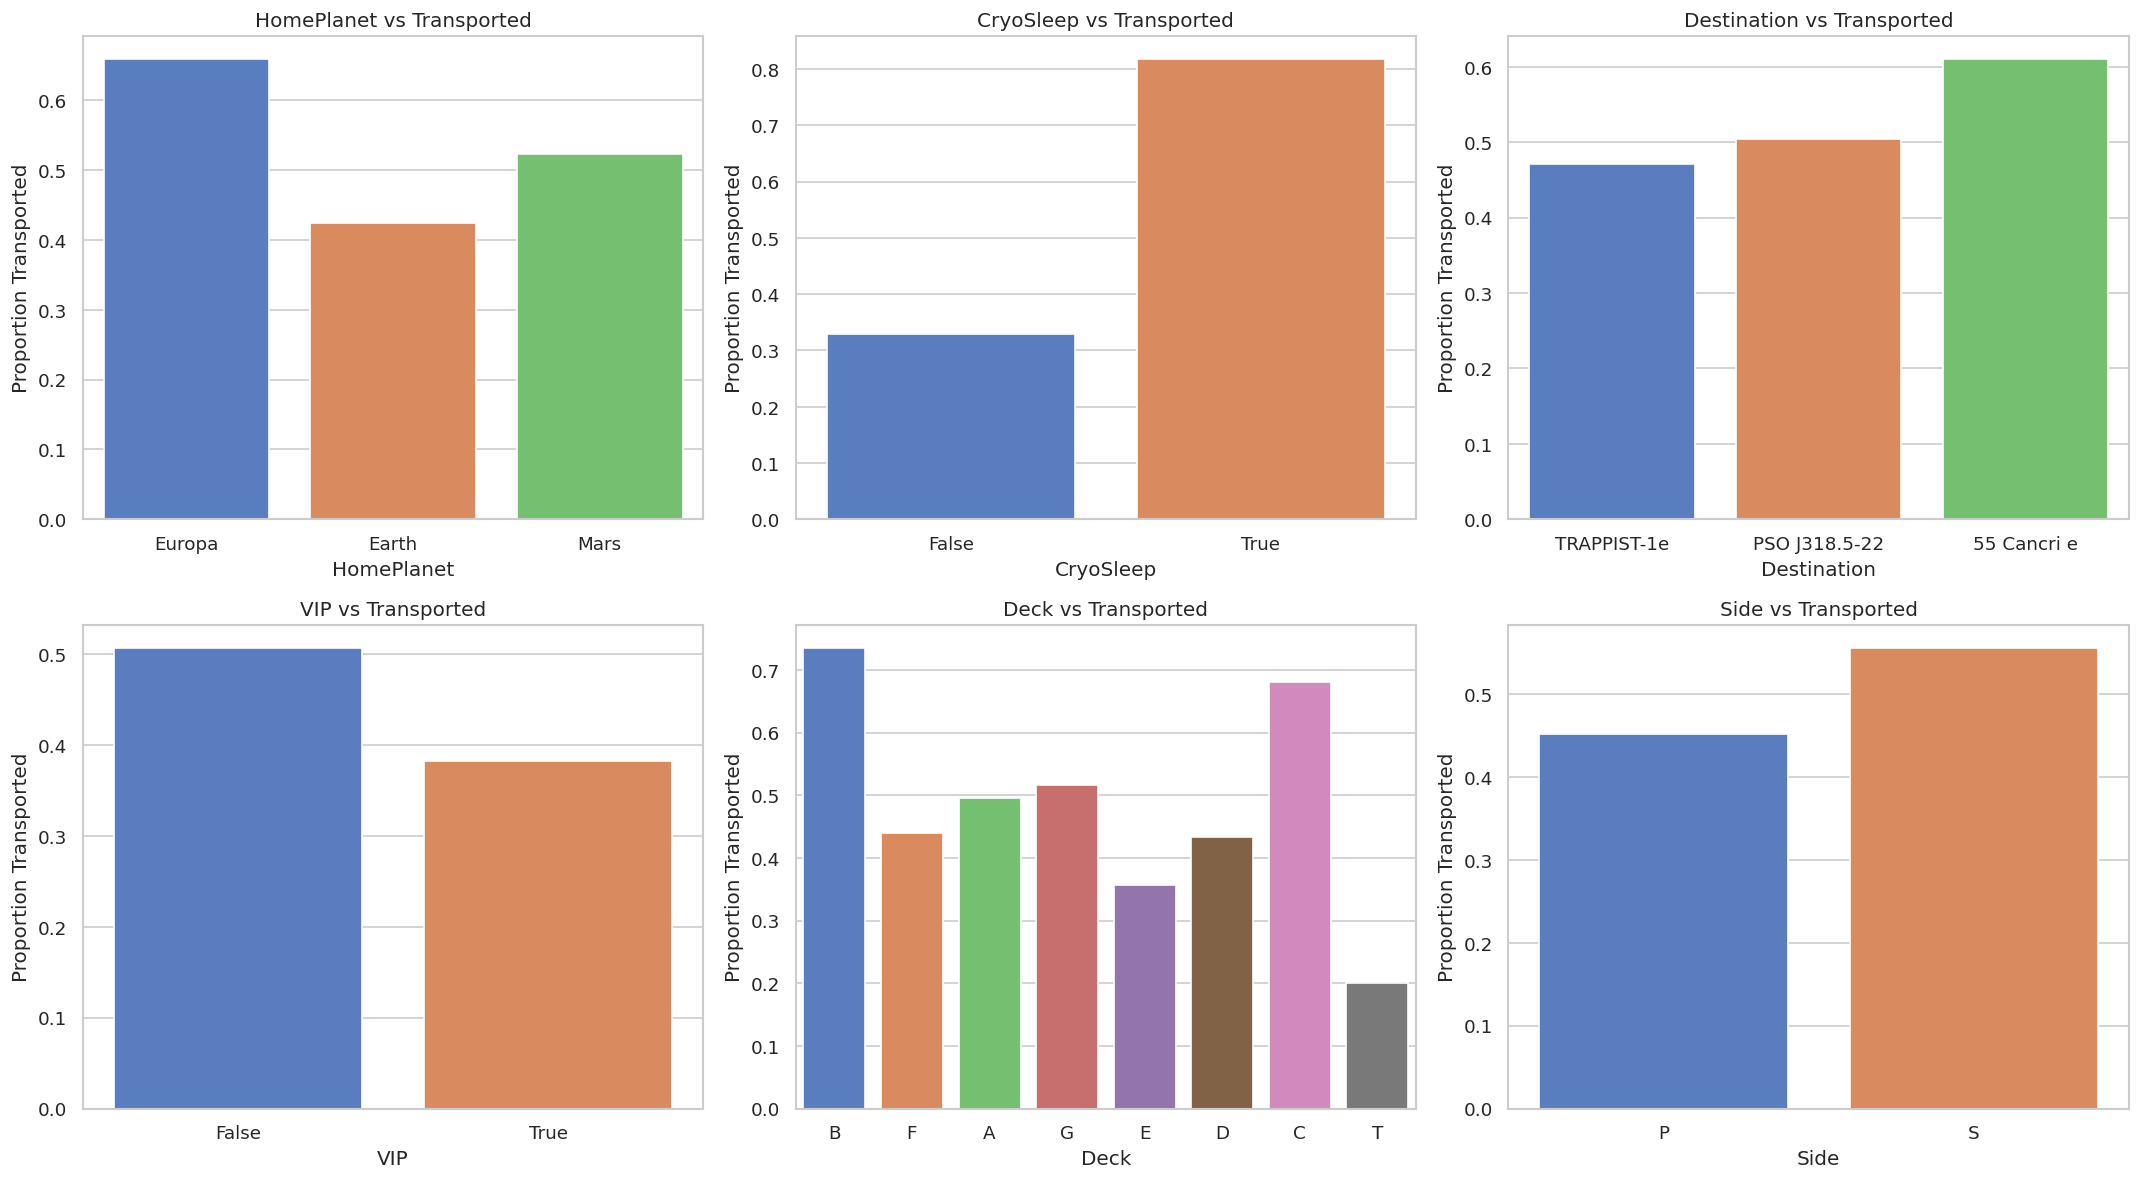

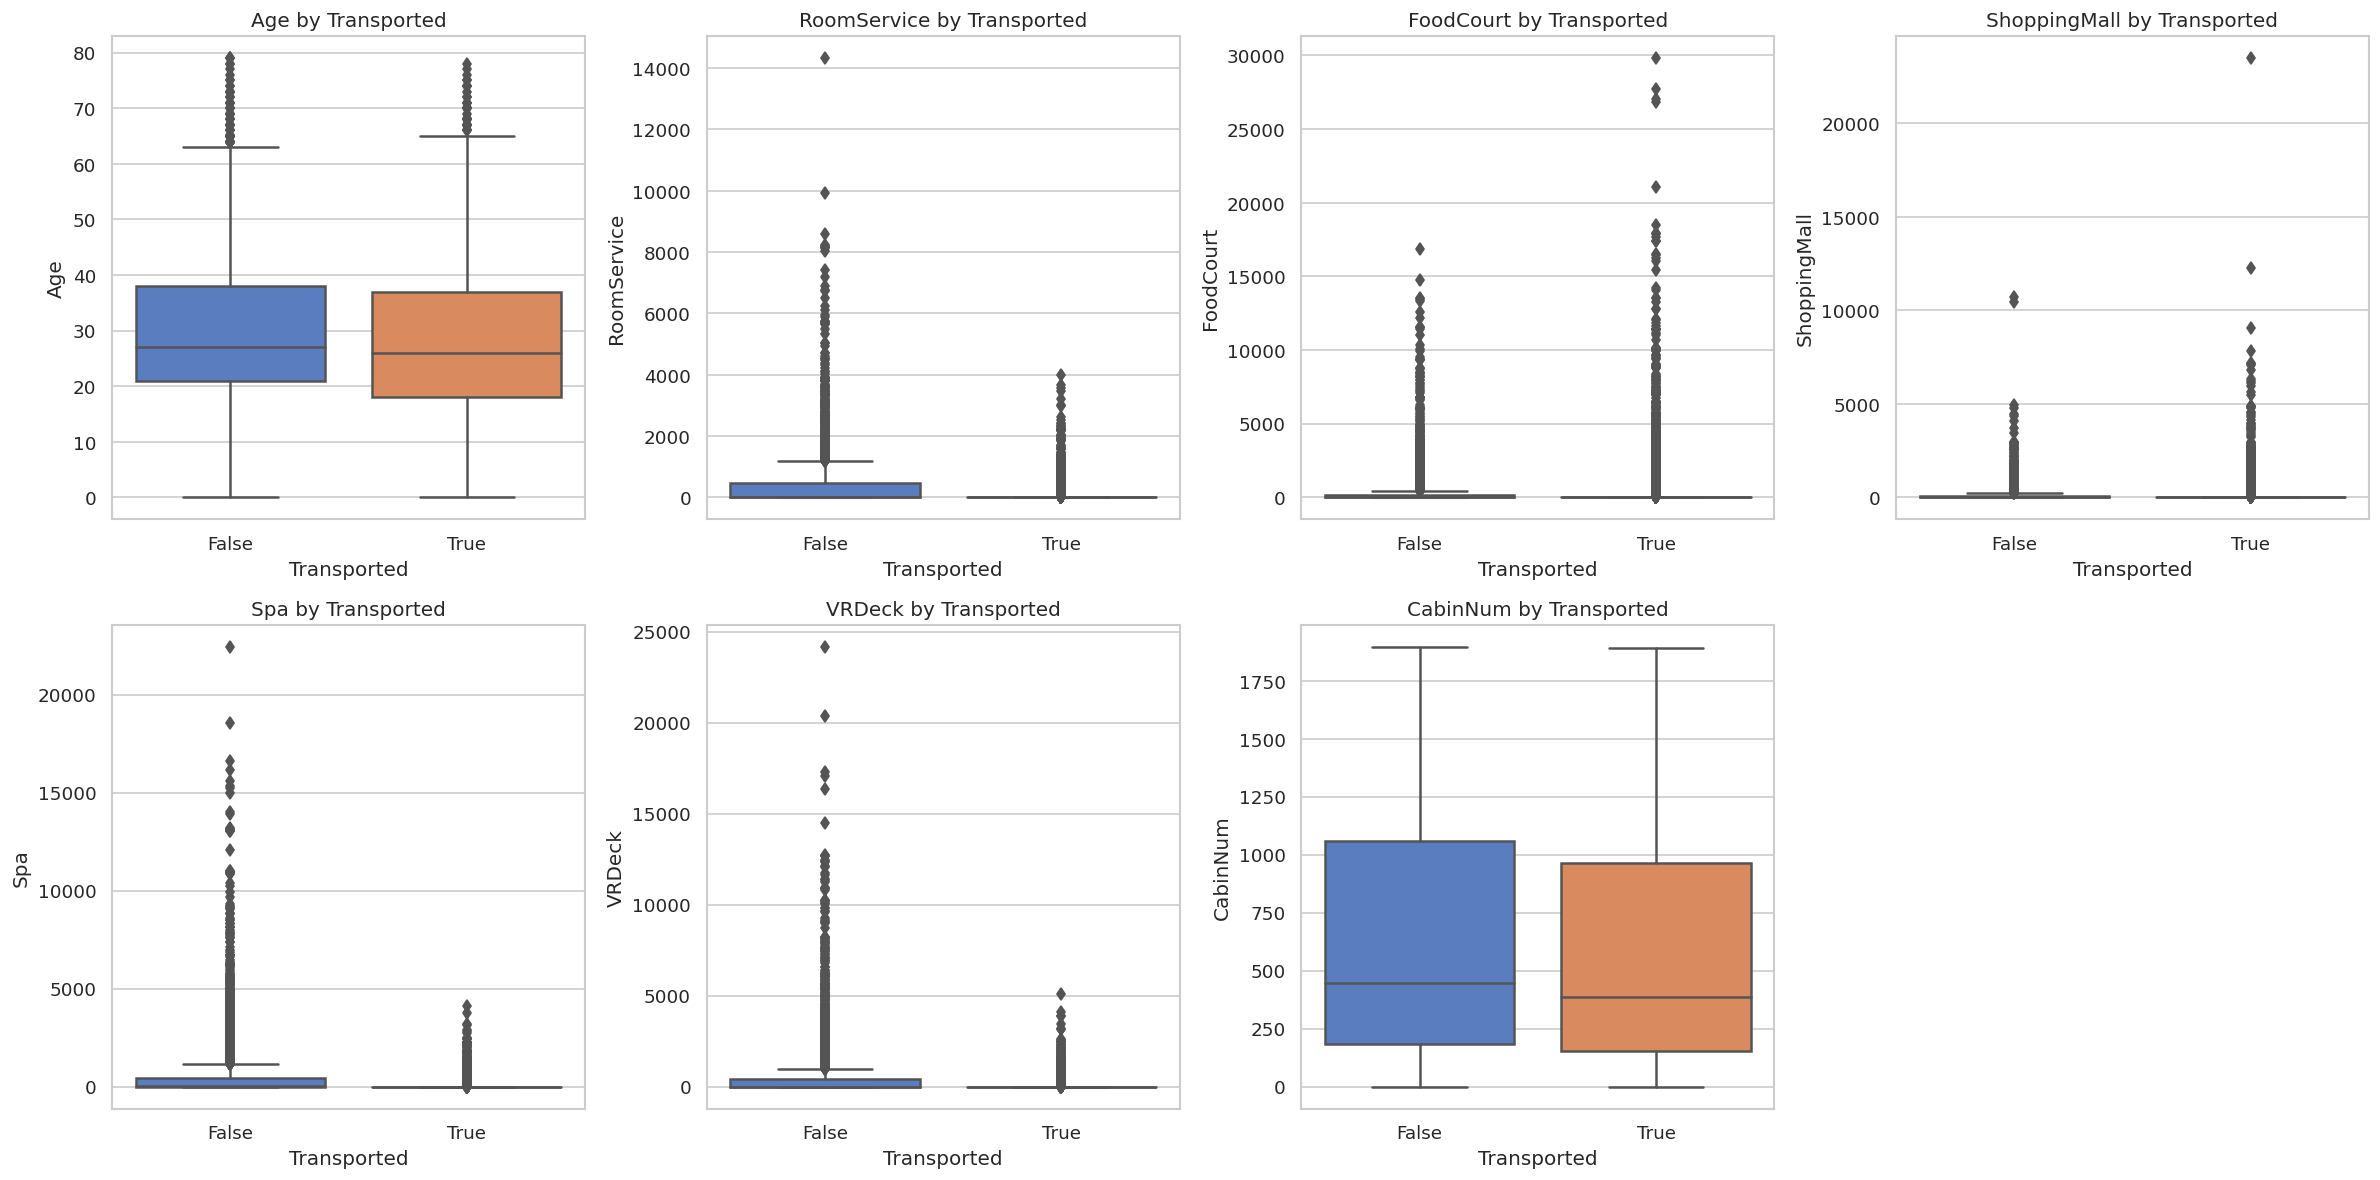

In [15]:


# --- Categorical Features vs Target (updated) ---
categorical_features = [
    'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
    'Deck', 'Side'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.barplot(
        data=train, x=col, y='Transported',
        estimator=lambda v: sum(v) / len(v),
        ax=axes[i], errorbar=None
    )
    axes[i].set_title(f'{col} vs Transported')
    axes[i].set_ylabel('Proportion Transported')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# --- Numerical Features vs Target (updated) ---
numerical_features = [
    'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
    'CabinNum'
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(
        data=train, x='Transported', y=col, ax=axes[i]
    )
    axes[i].set_title(f'{col} by Transported')

# Hide any empty subplot if len(numerical_features) < total axes
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


* Deck: There’s a visible spread — B and C decks have the highest transport rates (0.7), while G and T drop notably.
* Side: Passengers on Side ‘S’ have a higher chance (0.53) of being transported than those on ‘P’ (0.45).
* CabinNum: Distribution between transported/non‑transported groups is similar, though there might be slight shifts in central location — binning into “front/mid/back” could reveal more.

# Missing values

In [16]:
from sklearn.impute import SimpleImputer
import pandas as pd

# --- Separate features by type ---
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove target from lists
numeric_cols = [col for col in numeric_cols if col != 'Transported']
categorical_cols = [col for col in categorical_cols if col != 'Transported']

# --- Imputers ---
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Fit on train, transform both train and test
train[numeric_cols] = num_imputer.fit_transform(train[numeric_cols])
test[numeric_cols]  = num_imputer.transform(test[numeric_cols])

train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])
test[categorical_cols]  = cat_imputer.transform(test[categorical_cols])

# --- Check missingness after imputation ---
print("Missing in train after fill:", train.isnull().sum().sum())
print("Missing in test after fill:", test.isnull().sum().sum())


Missing in train after fill: 0
Missing in test after fill: 0


- So we don't have any missing values, then we can go on